Logistic regression :
Accuracy score : 0.8125
Precision score : 0.8148148148148148

K Nearest Neighbours : 
Accuracy score : 0.9
Precision score : 0.8333333333333334





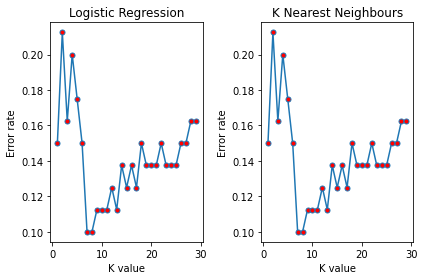

In [62]:
'''
Project 2:
 
For given “logistic_data.csv” dataset, determine the classification model.
a)	Using logistic regression algorithm.
b)	Using KNN algorithm
c)	Compare (a) and (b) and state which gives better performance in terms of metric parameter such as accuracy score, precision score, recall.

'''

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score
from sklearn.neighbors import KNeighborsClassifier

# Import data set
dataset=pd.read_csv('../Data/Logistic Data.csv')


# To create feature matrix and dependent variable vector
a=dataset.iloc[:,:-1].values
b=dataset.iloc[:,-1].values

# Replace the missing data

imputer=SimpleImputer(missing_values=np.nan,strategy='mean')
imputer.fit(a[:,:])
a[:,:]=imputer.transform(a[:,:])

# Spiliting of data set into training and testing set

atrain,atest,btrain,btest=train_test_split(a,b,test_size=0.2,random_state=1)

# Feature scaling

sc=StandardScaler()
atrain=sc.fit_transform(atrain)
atest=sc.fit_transform(atest)


# Using logistic regression algorithm.
# Training the classification model

LoR=LogisticRegression(random_state=0)
LoR.fit(atrain,btrain)

# Testing the linear model
bestimated=LoR.predict(atest)

# Performance matrix
cm=confusion_matrix(btest,bestimated)
print("Logistic regression :")
print(f"Accuracy score : {accuracy_score(btest,bestimated)}")
print(f"Precision score : {precision_score(btest,bestimated)}")

error_rate=[]
for i in range(1,30):
    KC=KNeighborsClassifier(n_neighbors=i)
    KC.fit(atrain,btrain)
    bpred_i=KC.predict(atest)
    error_rate.append(np.mean(bpred_i!=btest))


fig = plt.figure()
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.set_title("Logistic Regression")
ax1.plot(range(1,30),error_rate,marker='o',markerfacecolor='red',markersize=5)
ax1.set_xlabel('K value')
ax1.set_ylabel('Error rate')

# By using KNN Algorithm
# Build my KNN classification model
# Training the classification model

KC=KNeighborsClassifier(n_neighbors=7,weights='uniform',p=2)
KC.fit(atrain,btrain)

# Testing the linear model
bestimated=KC.predict(atest)

# Performance matrix

cm=confusion_matrix(btest,bestimated)
print("\nK Nearest Neighbours : ")
print(f"Accuracy score : {accuracy_score(btest,bestimated)}")
print(f"Precision score : {precision_score(btest,bestimated)}")
print("\n\n")

error_rate=[]
for i in range(1,30):
    KC=KNeighborsClassifier(n_neighbors=i)
    KC.fit(atrain,btrain)
    bpred_i=KC.predict(atest)
    error_rate.append(np.mean(bpred_i!=btest))


ax2.set_title("K Nearest Neighbours")
ax2.plot(range(1,30),error_rate,marker='o',markerfacecolor='red',markersize=5)
ax2.set_xlabel('K value')
ax2.set_ylabel('Error rate')


fig.tight_layout()
plt.show()



'''
According to the performance metrics, The KNN algorithm provides a better accuracy score 
and precision score than that of Logistic Regression . 

Logistic regression :
Accuracy score : 0.8125
Precision score : 0.8148148148148148

K Nearest Neighbours : 
Accuracy score : 0.9
Precision score : 0.8333333333333334

'''
